<a href="https://colab.research.google.com/github/Thammarach/ML-KNN-Regression/blob/main/ML_KNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean Data

Dataset using kc_house_data.csv

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset_KU/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Select Columns for Predict

In [ ]:
X = df[ [ 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
         'condition', 'grade'] ]
X

,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade
0,3,1180,5650,1.0,0,3,7
1,3,2570,7242,2.0,0,3,7
2,2,770,10000,1.0,0,3,6
3,4,1960,5000,1.0,0,5,7
4,3,1680,8080,1.0,0,3,8
...,...,...,...,...,...,...,...
21608,3,1530,1131,3.0,0,3,8
21609,4,2310,5813,2.0,0,3,8
21610,2,1020,1350,2.0,0,3,7
21611,3,1600,2388,2.0,0,3,8


In [ ]:
y = df['price'] 
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [ ]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [ ]:
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


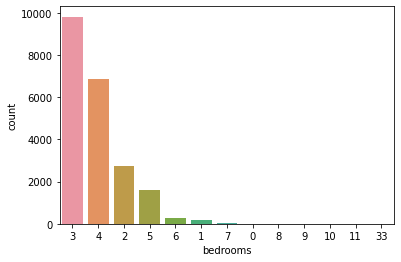

In [ ]:
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train, y_train)

0.20873337189126662

In [ ]:
knn.score(X_test,y_test)

0.003007170946102244

In [ ]:
knn.predict( X_train[0:3] )

array([349950., 273000., 480000.])

In [ ]:
knn.classes_

array([  75000.,   78000.,   80000., ..., 6885000., 7062500., 7700000.])

# Grid Search

In [ ]:
param_grid = { 'n_neighbors':[29,31,33,35,37,39,41,43,45] }

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_gridsearch = KNeighborsClassifier()

In [ ]:
grid_search = GridSearchCV(knn_gridsearch,
                           param_grid)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [29, 31, 33, 35, 37, 39, 41, 43, 45]})

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.01862903, 0.0179903 , 0.01884003, 0.01971297, 0.01810312,
        0.01824818, 0.01954827, 0.01850877, 0.01809268]),
 'mean_score_time': array([0.12742348, 0.12755132, 0.12846193, 0.12868609, 0.13831253,
        0.13656192, 0.13307948, 0.136696  , 0.1370543 ]),
 'mean_test_score': array([0.00532099, 0.00526316, 0.00572585, 0.00566802, 0.00572585,
        0.00561018, 0.00584153, 0.00618855, 0.00618855]),
 'param_n_neighbors': masked_array(data=[29, 31, 33, 35, 37, 39, 41, 43, 45],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 29},
  {'n_neighbors': 31},
  {'n_neighbors': 33},
  {'n_neighbors': 35},
  {'n_neighbors': 37},
  {'n_neighbors': 39},
  {'n_neighbors': 41},
  {'n_neighbors': 43},
  {'n_neighbors': 45}],
 'rank_test_score': array([8, 9, 5, 6, 4, 7, 3, 1, 1], dtype=int32),
 'split0_test_score': array([0.00433777, 0.004

In [ ]:
grid_search.best_params_

{'n_neighbors': 43}

In [ ]:
grid_search.best_score_

0.006188548293811451

In [ ]:
grid_search.score(X_train, y_train)

0.05060728744939271

In [ ]:
grid_search.score(X_test, y_test)

0.004626416840157298

In [ ]:
knn.kneighbors(X_test.iloc[[0],:])

(array([[ 22.36067977,  60.94259594,  63.03967005,  80.02499609,
         102.        ]]), array([[ 4010,   763, 12504, 11837,  3840]]))

In [ ]:
X_test.iloc[[0],:]

,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade
6178,4,3010,6202,2.0,0,3,9


In [ ]:
grid_search.best_estimator_.kneighbors(X_test.iloc[[0],:])

(array([[ 22.36067977,  60.94259594,  63.03967005,  80.02499609,
         102.        , 110.92790451, 116.6190379 , 118.44407963,
         122.68251709, 129.39474487, 133.06765197, 134.37261626,
         135.90069904, 140.01428499, 142.57980222, 145.7326319 ,
         150.029997  , 151.01324445, 154.03571015, 160.20299623,
         160.26618483, 166.20770139, 168.81054469, 169.1921984 ,
         169.70857374, 170.30267173, 171.77019532, 174.20964382,
         178.16004041, 178.4572778 , 181.59845814, 181.94504665,
         182.11260253, 182.17025004, 184.17654574, 188.7432118 ,
         191.37920472, 195.2562419 , 195.72940505, 198.7032964 ,
         202.25478981, 202.27024003, 202.27209397]]),
 array([[ 4010,   763, 12504, 11837,  3840,  7038, 12982, 13888,  1853,
          2209,  9883,  7437,  2250,   133,  5248,  7809,  3730, 11662,
         16248,   410, 12597, 15194,   884,  9984, 17230, 13712,  1418,
          2167,  7295,  7218,   994, 11589,  7128,  7186,  7391, 12569,
        

# Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()

In [ ]:
std_scaler.fit(X_train)

StandardScaler()

In [ ]:
std_scaler.mean_

array([3.37067669e+00, 2.07844101e+03, 1.51946891e+04, 1.49329092e+00,
       7.57663389e-03, 3.40722961e+00, 7.65153268e+00])

In [ ]:
std_scaler.scale_

array([9.35617841e-01, 9.16737798e+02, 4.24490497e+04, 5.38576715e-01,
       8.67134852e-02, 6.46908218e-01, 1.17382984e+00])

In [ ]:
X_train_transformed = std_scaler.transform(X_train)

In [ ]:
pd.DataFrame(X_train_transformed, columns=X_train.columns)

,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade
0,-1.464996,-0.478262,-0.259574,-0.915916,-0.087375,0.916313,-0.555049
1,-1.464996,-0.761877,-0.315547,0.940830,-0.087375,-0.629501,-0.555049
2,-0.396184,-1.165482,-0.285865,0.012457,-0.087375,-0.629501,-1.406961
3,0.672629,-0.347363,-0.186734,-0.915916,-0.087375,0.916313,-0.555049
4,0.672629,2.772395,0.131883,0.940830,-0.087375,0.916313,2.852600
...,...,...,...,...,...,...,...
17285,1.741441,1.212516,0.040644,-0.915916,-0.087375,-0.629501,1.148776
17286,0.672629,0.459847,-0.234109,0.940830,-0.087375,-0.629501,0.296864
17287,-0.396184,-0.565528,-0.021359,-0.915916,-0.087375,-0.629501,-1.406961
17288,0.672629,0.776186,0.657172,0.940830,-0.087375,0.916313,1.148776


In [ ]:
grid_search.fit(X_train_transformed, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [29, 31, 33, 35, 37, 39, 41, 43, 45]})

In [ ]:
grid_search.best_params_

{'n_neighbors': 35}

In [ ]:
grid_search.best_score_

0.007287449392712551

In [ ]:
grid_search.score(X_train_transformed, y_train)

0.05633314054366686

In [ ]:
X_test_transformed = std_scaler.transform(X_test)

In [ ]:
grid_search.score(X_test_transformed, y_test)

0.0071709461022438125

# One-hot encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder_1h = OneHotEncoder()

In [ ]:
X_cat = df[['zipcode']]
X_cat

,zipcode
0,98178
1,98125
2,98028
3,98136
4,98074
...,...
21608,98103
21609,98146
21610,98144
21611,98027


In [ ]:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y)

In [ ]:
encoder_1h.fit(X_cat_train)

OneHotEncoder()

In [ ]:
encoder_1h.get_feature_names_out()

array(['zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', '

In [ ]:
X_cat_train_transformed = encoder_1h.transform(X_cat_train)

In [ ]:
X_cat_train_transformed.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
knn.fit(X_cat_train_transformed, y_cat_train)

KNeighborsClassifier()

In [ ]:
X_cat_test_transformed = encoder_1h.transform(X_cat_test)

In [ ]:
knn.score(X_cat_train_transformed, y_cat_train)

0.007218212104386452

In [ ]:
knn.score(X_cat_test_transformed, y_cat_test)

0.0038860103626943004

In [ ]:
knn.predict(X_cat_test_transformed.toarray()[0:5])

array([594950., 168500., 300000., 286000., 462608.])

In [ ]:
X_cat_test_transformed.toarray()[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
encoder_1h.inverse_transform(X_cat_test_transformed.toarray()[0:5])

array([[98075],
       [98042],
       [98027],
       [98038],
       [98029]])

# Make Column Transformer

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df[ [ 'bedrooms', 'bathrooms',
      'sqft_living', 'sqft_lot', 'floors', 'waterfront',
      'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
      'yr_renovated', 'lat', 'long', 'sqft_living15', 'zipcode' ] ]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
transformer = make_column_transformer(
    ( MinMaxScaler(), ['bedrooms', 'bathrooms',
      'sqft_living', 'sqft_lot', 'floors', 'waterfront',
      'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
      'yr_renovated', 'lat', 'long', 'sqft_living15'] ),
    ( OneHotEncoder(), ['zipcode' ])
)

In [ ]:
X_train_transformed = transformer.fit_transform(X_train)

In [ ]:
X_train_transformed.toarray().shape

(17290, 86)

In [ ]:
transformer.get_feature_names_out()

array(['minmaxscaler__bedrooms', 'minmaxscaler__bathrooms',
       'minmaxscaler__sqft_living', 'minmaxscaler__sqft_lot',
       'minmaxscaler__floors', 'minmaxscaler__waterfront',
       'minmaxscaler__view', 'minmaxscaler__condition',
       'minmaxscaler__grade', 'minmaxscaler__sqft_above',
       'minmaxscaler__sqft_basement', 'minmaxscaler__yr_built',
       'minmaxscaler__yr_renovated', 'minmaxscaler__lat',
       'minmaxscaler__long', 'minmaxscaler__sqft_living15',
       'onehotencoder__zipcode_98001', 'onehotencoder__zipcode_98002',
       'onehotencoder__zipcode_98003', 'onehotencoder__zipcode_98004',
       'onehotencoder__zipcode_98005', 'onehotencoder__zipcode_98006',
       'onehotencoder__zipcode_98007', 'onehotencoder__zipcode_98008',
       'onehotencoder__zipcode_98010', 'onehotencoder__zipcode_98011',
       'onehotencoder__zipcode_98014', 'onehotencoder__zipcode_98019',
       'onehotencoder__zipcode_98022', 'onehotencoder__zipcode_98023',
       'onehotencoder__zip

In [ ]:
X_test_transformed = transformer.transform(X_test)

In [ ]:
grid_search.fit(X_train_transformed,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [29, 31, 33, 35, 37, 39, 41, 43, 45]})

In [ ]:
grid_search.best_params_

{'n_neighbors': 37}

In [ ]:
grid_search.best_score_

0.011104684788895317

In [ ]:
grid_search.score(X_train_transformed, y_train)

0.058357432041642565

In [ ]:
y_predict = grid_search.predict(X_test_transformed)

# Linear Regression

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
X = df[['sqft_living']]

In [ ]:
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=30)

In [ ]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=30)

In [ ]:
knn_reg.score(X_train, y_train)

0.543884548872572

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [ ]:
X_train

,sqft_living
19858,7850
12884,4270
18066,2250
14653,3270
19702,2690
...,...
20548,2390
18950,1930
18856,930
5655,730


In [ ]:
y_train_predict = knn_reg.predict(X_train)
y_train_predict

array([2615568.33333333, 1436693.66666667,  521171.33333333, ...,
        336708.33333333,  268729.16666667,  451266.66666667])

In [ ]:
y_train

19858    2700000.0
12884    1610000.0
18066     589000.0
14653     560000.0
19702     359950.0
           ...    
20548     460000.0
18950     268000.0
18856     269500.0
5655      378500.0
20353     342000.0
Name: price, Length: 17290, dtype: float64

In [ ]:
mean_squared_error(y_train, y_train_predict) ** 0.5

251715.10123701062

In [ ]:
mean_absolute_percentage_error(y_train, y_train_predict)

0.3471248690672228

In [ ]:
y_test_predict = knn_reg.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_test_predict) ** 0.5

241852.49031442023

In [ ]:
mean_absolute_percentage_error(y_test, y_test_predict)

0.35832801340903925

Linear Regression

In [ ]:
import seaborn as sns

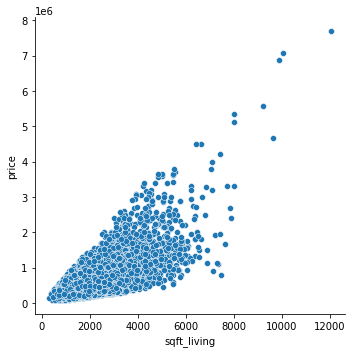

In [ ]:
sns.relplot(x=X_train['sqft_living'], y=y_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_predict_lm = lm.predict(X_train)

In [ ]:
mean_squared_error(y_train, y_train_predict_lm) ** 0.5

264302.25475985697

In [ ]:
y_test_predict_lm = lm.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_test_predict_lm) ** 0.5

249814.3120628812

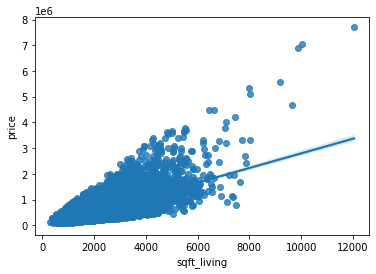

In [ ]:
sns.regplot(x=X_train['sqft_living'], y=y_train)

# Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
X_train_transformed = poly_features.fit_transform(X_train)

In [ ]:
lm.fit(X_train_transformed, y_train)

LinearRegression()

In [ ]:
lm.intercept_

234554.36780244904

In [ ]:
lm.coef_

array([4.05557233e+01, 4.09259497e-02, 7.00119650e-07])

In [ ]:
y_train_predict_poly = lm.predict(X_train_transformed)

In [ ]:
mean_squared_error(y_train, y_train_predict_poly) ** 0.5

249396.28187712748

In [ ]:
y_test_predict_poly = lm.predict(
                            poly_features.transform(X_test)
                        )

In [ ]:
mean_squared_error(y_test, y_test_predict_poly) ** 0.5

264846.16194356646